In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [178]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


평균연령이 약 30이고 SibSp의 평균을 보니 혼자 탄 사람들이 많네.

- 결측값 처리

In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [179]:
data = data.drop('Cabin',axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
age_nas = data[data['Age'].isna() == True]

In [15]:
age_nas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [180]:
from sklearn.impute import KNNImputer
KNN_imputer = KNNImputer(n_neighbors=1)
data['Age'] = KNN_imputer.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

In [17]:
age_nas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [18]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [19]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [181]:
data['Embarked'] = data['Embarked'].fillna("S")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


- 이상값 확인

In [22]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

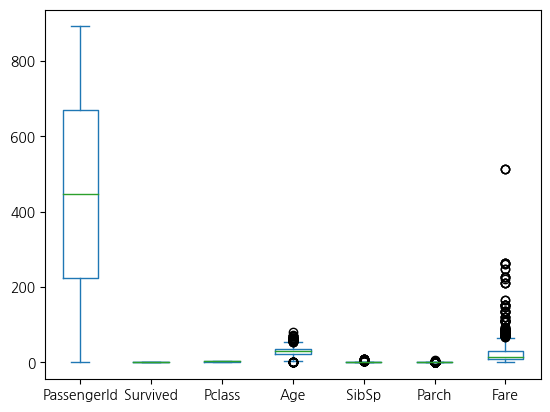

In [23]:
data.plot(kind='box')

* 금액에 이상값이 많은 이유는 무엇일까?

<AxesSubplot:>

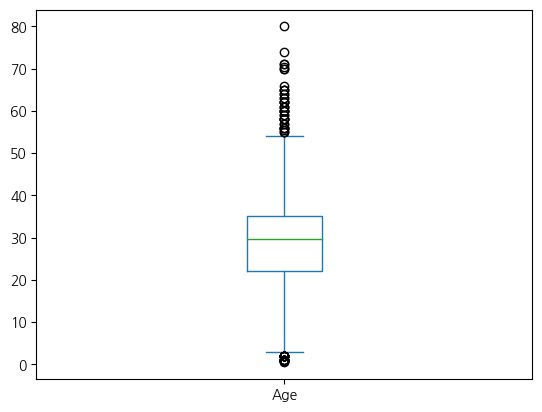

In [24]:
data['Age'].plot(kind='box')

In [25]:
177 / 891 * 100

19.865319865319865

- Age의 결측값이 약 20%였는데 이걸 근접값으로 바꿨으니 이상값부분이 더 많아졌겠네

<AxesSubplot:>

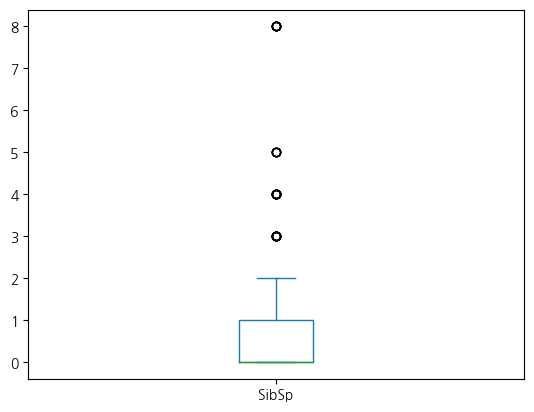

In [26]:
data['SibSp'].plot(kind='box')

<AxesSubplot:>

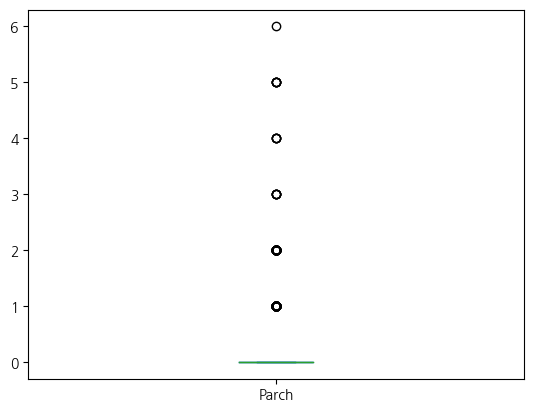

In [27]:
data['Parch'].plot(kind='box')

- Sib와 Parch는 혼자 탄 사람들이 많았으니 이렇게 이상값이 나왔을거고

<AxesSubplot:>

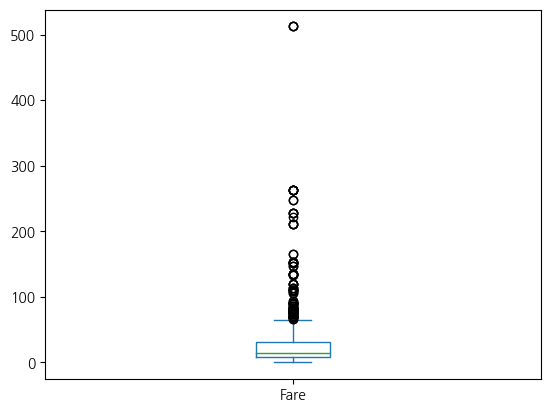

In [28]:
data['Fare'].plot(kind='box')

- 개개인의 Fare값이 아닐수도 있겠네

In [29]:
# 아웃라이어를 계산하는 함수
def outlier(x):
    x = x.describe()
    out_max = x.loc['75%'] + (1.5 * (x.loc['75%'] - x.loc['25%']))
    out_min = x.loc['25%'] - (1.5 * (x.loc['75%'] - x.loc['25%']))
    ol_result = pd.DataFrame([out_max, out_min], columns=out_max.index, index=['상한값', '하한값'])
    result = pd.concat([x, ol_result])
    return result

In [30]:
outlier(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000


In [31]:
data[data['Fare'] > 65.634400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


In [32]:
data.loc[data['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,CA. 2343,69.55,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,CA. 2343,69.55,S
201,202,0,3,"Sage, Mr. Frederick",male,29.699118,8,2,CA. 2343,69.55,S
324,325,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,CA. 2343,69.55,S
792,793,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,CA. 2343,69.55,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.55,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.55,S


In [33]:
69.55 / 8

8.69375

In [34]:
data.loc[data['Ticket'] == '19950']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,S


In [35]:
263 / 4 

65.75

In [36]:
data.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [37]:
data[data['SibSp'] == 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,S


In [38]:
data[data['Ticket'] == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,S


- 부모님은 Parch에 본인포함 애들의 수를 적은 거 같고, 애들은 자신들의 남매의 수와 부모의 수를 적은 거 같네

In [39]:
data[data['Parch'] == 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q


In [40]:
data[data['Ticket'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,S


In [41]:
data[data['Ticket'] == '347077']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,S


- 부모님이 한 명 탄거고

In [42]:
data[data['Ticket'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,S


- 부모둘이 다 탑승하면 이런형태이구나!

In [43]:
data[data['Parch'] == 4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.900,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.900,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S


In [44]:
data[data['Ticket'] == '347088']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,S


In [45]:
data[data['Ticket'] == '19950']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,S


결론: 가족의 수는 Parch+Sib

In [183]:
data['family'] = data['SibSp'] + data['Parch']

In [47]:
data['family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

In [48]:
data[data['family'] == 10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
159,160,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,CA. 2343,69.55,S,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,CA. 2343,69.55,S,10
201,202,0,3,"Sage, Mr. Frederick",male,29.699118,8,2,CA. 2343,69.55,S,10
324,325,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,CA. 2343,69.55,S,10
792,793,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,CA. 2343,69.55,S,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.55,S,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.55,S,10


- 8자식이 다 죽은거구나..

In [49]:
data[data['family'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,S,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


In [50]:
data.groupby('family')['Ticket'].value_counts(sort=True)

family  Ticket  
0       1601        7
        LINE        4
        110152      3
        239853      3
        PC 17757    3
                   ..
6       347082      7
        347077      4
        3101281     1
7       CA 2144     6
10      CA. 2343    7
Name: Ticket, Length: 708, dtype: int64

In [51]:
data.loc[data['Ticket'] == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
74,75,1,3,"Bing, Mr. Lee",male,32.000000,0,0,1601,56.4958,S,0
169,170,0,3,"Ling, Mr. Lee",male,28.000000,0,0,1601,56.4958,S,0
509,510,1,3,"Lang, Mr. Fang",male,26.000000,0,0,1601,56.4958,S,0
643,644,1,3,"Foo, Mr. Choong",male,29.699118,0,0,1601,56.4958,S,0
692,693,1,3,"Lam, Mr. Ali",male,29.699118,0,0,1601,56.4958,S,0
826,827,0,3,"Lam, Mr. Len",male,29.699118,0,0,1601,56.4958,S,0
838,839,1,3,"Chip, Mr. Chang",male,32.000000,0,0,1601,56.4958,S,0


In [52]:
data.loc[data['Name'].str.contains('Lam')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,29.699118,0,0,113510,35.0000,S,0
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,S,2
692,693,1,3,"Lam, Mr. Ali",male,29.699118,0,0,1601,56.4958,S,0
826,827,0,3,"Lam, Mr. Len",male,29.699118,0,0,1601,56.4958,S,0


In [53]:
data.loc[data['Ticket'] == 'LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S,0


In [54]:
data.loc[data['Name'].str.contains('Johnson')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,S,2
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,S,0
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,S,0
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S,2


-어라 Fare가 없네

In [55]:
data.loc[data['Ticket'] == 'PC 17757']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.525,C,0
557,558,0,1,"Robbins, Mr. Victor",male,29.699118,0,0,PC 17757,227.525,C,0
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.000000,1,0,PC 17757,227.525,C,1
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.000000,0,0,PC 17757,227.525,C,0


In [56]:
data.loc[data['Ticket'] == 'PC 17760']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,S,0
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C,0
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,C,0


In [57]:
data.loc[data['Ticket'] == '239853']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,S,0
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,S,0


In [58]:
data.loc[data['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,S,0
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,S,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,S,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,S,0
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,S,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,S,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,S,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,S,0


- Fare가 0인 사람들의 특징
  - 보통 나이, 가족정보를 안 적음.
  - 모두 남자임.( 총 15명)

In [185]:
data['family'] = data['family'].apply(lambda x: 1 if x == 0 else x)


In [60]:
data['family'].value_counts()

1     698
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  family       891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [62]:
698 / 891 * 100

78.33894500561168

- 혼자 탄 사람의 비율 : 78%
- 동반 탑승 : 22%

- 이제 Fare의 이상값을 조정해보자.

In [63]:
outlier(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.507295
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.323386
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400,1.000000
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000,1.000000


In [64]:
data[data['Fare'] > 65.634400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S,5
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C,1
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S,10
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C,1
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S,2
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S,10


In [65]:
data.groupby('family')['Fare'].mean()

family
1     27.851402
2     39.692482
3     54.864510
4     58.094453
5     73.722727
6     29.366667
7     46.900000
10    69.550000
Name: Fare, dtype: float64

In [66]:
data.groupby(["family", "Pclass"])["Fare"].mean()

family  Pclass
1       1          74.690875
        2          16.681853
        3           9.891118
2       1          95.681075
        2          31.693819
        3          16.378277
3       1         133.521429
        2          36.575969
        3          20.103689
4       1         262.375000
        2          23.000000
        3          26.972233
5       1         263.000000
        2          18.750000
        3          32.420588
6       3          29.366667
7       3          46.900000
10      3          69.550000
Name: Fare, dtype: float64

In [67]:
data['adj_fare'] = data['Fare'] / data['family']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,8.0500


In [68]:
data['adj_fare'].describe()

count    891.000000
mean      25.459938
std       43.657191
min        0.000000
25%        7.775000
50%       10.500000
75%       26.000000
max      512.329200
Name: adj_fare, dtype: float64

In [69]:
data.loc[data['family']==10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
159,160,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,CA. 2343,69.55,S,10,6.955
180,181,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,CA. 2343,69.55,S,10,6.955
201,202,0,3,"Sage, Mr. Frederick",male,29.699118,8,2,CA. 2343,69.55,S,10,6.955
324,325,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,CA. 2343,69.55,S,10,6.955
792,793,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,CA. 2343,69.55,S,10,6.955
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.55,S,10,6.955
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.55,S,10,6.955


In [70]:
data.loc[data['family']==7]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,S,7,6.7
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,S,7,6.7
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,S,7,6.7
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,S,7,6.7
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,S,7,6.7
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,S,7,6.7


In [71]:
data.loc[(data['Pclass']==1)&(data['family']==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,S,5,52.6
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,S,5,52.6
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,S,5,52.6
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,S,5,52.6


In [72]:
data.loc[(data['Pclass']==2)&(data['family']==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.75,S,5,3.75


In [73]:
data[data['Ticket'] == '29106']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.75,S,2,9.375
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.00,2,3,29106,18.75,S,5,3.750
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.75,S,2,9.375


In [74]:
data.loc[(data['Pclass']==3)&(data['family']==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,5,5.8250
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,S,5,7.9375
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S,5,5.5800
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,S,5,7.9375
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,S,5,5.5800
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,Q,5,5.8250
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,S,5,7.9375
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,Q,5,5.8250
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,S,5,5.5800
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,S,5,5.5800


In [75]:
data.loc[(data['Pclass']==3) & (data['family']==5) & (data['Name'].str.contains('Skoog'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,S,5,5.58
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,S,5,5.58
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,S,5,5.58
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,S,5,5.58
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,S,5,5.58
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,S,5,5.58


In [76]:
data.loc[(data['Pclass']==3) & (data['family']==5) & (data['Name'].str.contains('Skoog'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,S,5,5.58
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,S,5,5.58
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,S,5,5.58
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,S,5,5.58
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,S,5,5.58
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,S,5,5.58


In [77]:
data.loc[(data['Pclass']==3) & (data['family']==5) & (data['Name'].str.contains('Rice'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,Q,5,5.825
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,Q,5,5.825
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,Q,5,5.825
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,Q,5,5.825
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,Q,5,5.825


In [78]:
data.loc[(data['Pclass']==1)&(data['family']==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,S,5,52.6
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,S,5,52.6
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,S,5,52.6
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,S,5,52.6


In [197]:
data.loc[(data['Pclass']==2)&(data['family']==4)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0,S,4


In [190]:
data[data['Ticket'] == '29105']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0,S,4


In [196]:
data[data['Name'].str.contains('Hocking')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.75,S,5
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.50,S,3
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.00,S,4


- Hocking 세 가족은 다 다른 가족이잖아? family가 많은데 티켓 가격은 평균 언저리
- 이게 적용이 안되는 사람도 있네..같이 탑승한 가족을 적은 게 아니라 그냥 신원확인 겸 자기 가족을 적은건가.

In [198]:
data.loc[(data['Pclass']==3) & (data['family']==5) & (data['Name'].str.contains('Rice'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,Q,5
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,Q,5
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,Q,5
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,Q,5
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,Q,5


In [81]:
data.loc[(data['Pclass']==1)&(data['family']==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,S,3,50.516667
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,S,3,50.516667
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.00,S,3,40.000000
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.00,S,3,40.000000
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,S,3,50.516667
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.00,1,2,113760,120.00,S,3,40.000000
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.00,S,3,40.000000


In [82]:
data.loc[(data['Pclass']==1) & (data['family']==3) & (data['Name'].str.contains('Allison'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,S,3,50.516667
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,S,3,50.516667
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,S,3,50.516667


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  family       891 non-null    int64  
 12  adj_fare     891 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB


In [84]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,adj_fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.507295,25.459938
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.323386,43.657191
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,7.775000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,10.500000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,26.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,512.329200


In [85]:
outlier(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,adj_fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.507295,25.459938
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.323386,43.657191
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,7.775000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,10.500000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,26.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400,1.000000,53.337500
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000,1.000000,-19.562500


In [86]:
data.loc[data['adj_fare'] == 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1,512.3292
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,1,512.3292
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1,512.3292


In [87]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family', 'adj_fare'],
      dtype='object')

* 분석 목적: 생존 여부 판별

- 분석에서 사용할 변수 선택

In [88]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'family']]
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,1


<AxesSubplot:xlabel='Pclass,Survived'>

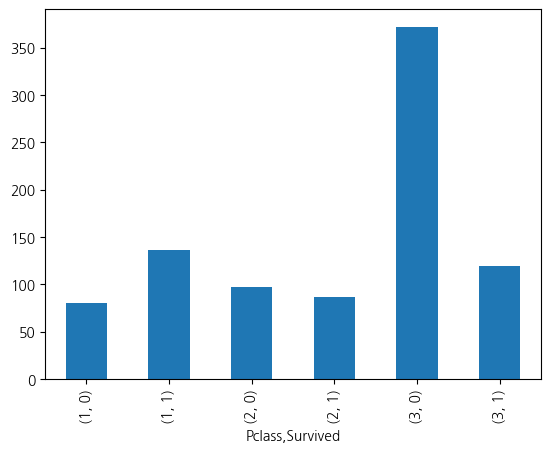

In [89]:
data.groupby('Pclass')['Survived'].value_counts(sort=False).plot(kind='bar')

- 1,2 클래스는 죽은사람과 산 사람의 비율이 비슷한데 3클래스의 남자들은 많이 죽었네

<AxesSubplot:xlabel='Sex,Survived'>

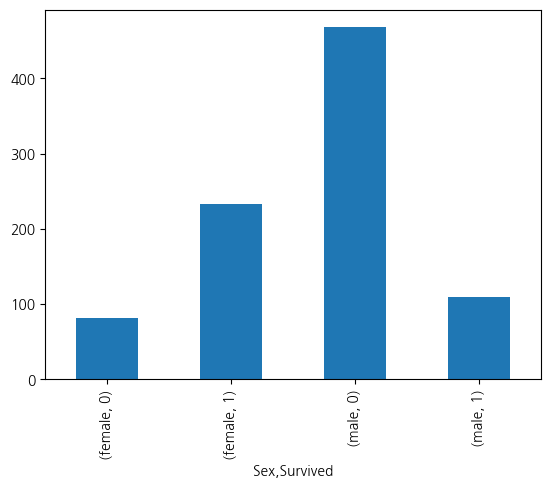

In [90]:
data.groupby('Sex')['Survived'].value_counts(sort=False).plot(kind='bar')

그중에서도 남자가 많이 죽었네. 그럼 3클래스에 남자가 많이 죽었네

<AxesSubplot:xlabel='Age,Survived'>

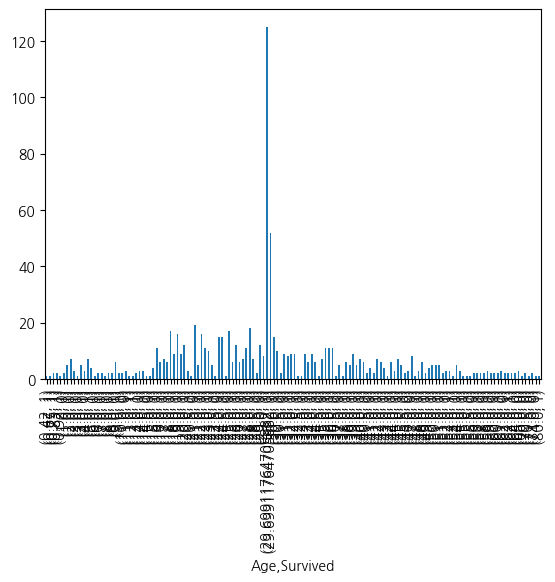

In [91]:
data.groupby('Age')['Survived'].value_counts(sort=False).plot(kind='bar')

In [92]:
def age_dist(age):
    if 0 <= age < 10:
        return 'under10s'
    elif 10 <= age < 20:
        return '10s'
    elif 20 <= age < 30:
        return '20s'
    elif 30 <= age < 40:
        return '30s'
    elif 40 <= age < 50:
        return '40s'
    elif 50 <= age < 60:
        return '50s'
    elif 60 <= age < 70:
        return '60s'
    elif 70 <= age < 80:
        return '70s'
    elif 80 <= age < 90:
        return '80s'

In [93]:
data['Age'] = data['Age'].apply(age_dist)

C:\Users\hi\AppData\Local\Temp\ipykernel_7700\2046297045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].apply(age_dist)


In [94]:
data['Age'].value_counts(sort=False)

20s         397
30s         167
50s          48
under10s     62
10s         102
40s          89
60s          19
70s           6
80s           1
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age,Survived'>

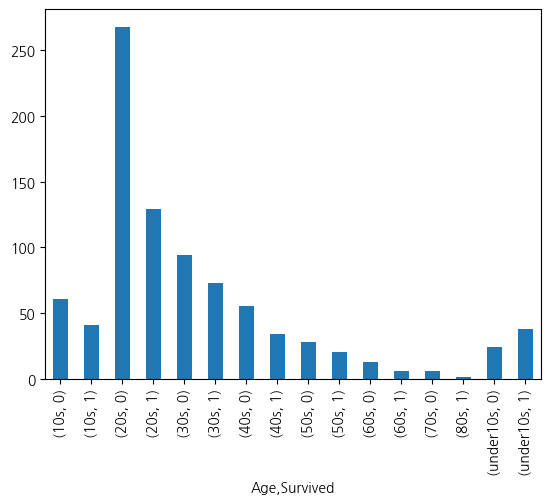

In [95]:
data.groupby('Age')['Survived'].value_counts(sort=False).plot(kind='bar')

In [96]:
# 나이에 따라 생존률 구하기
agedata = data.groupby('Age')['Survived'].value_counts(sort=False)
surv_ratio_result = {}
for idx2, i in zip(agedata.index, agedata):
    if idx2[1] == 0:
        dead = i
    elif idx2[1] == 1:
        surv = i
        surv_ratio = surv / (dead+surv) * 100
        print(f"{idx2[0]}의 생존율: ", surv_ratio)
        surv_ratio_result[idx2[0]] = surv_ratio
surv_ratio_result

10s의 생존율:  40.19607843137255
20s의 생존율:  32.49370277078086
30s의 생존율:  43.712574850299404
40s의 생존율:  38.20224719101123
50s의 생존율:  41.66666666666667
60s의 생존율:  31.57894736842105
80s의 생존율:  14.285714285714285
under10s의 생존율:  61.29032258064516


{'10s': 40.19607843137255,
 '20s': 32.49370277078086,
 '30s': 43.712574850299404,
 '40s': 38.20224719101123,
 '50s': 41.66666666666667,
 '60s': 31.57894736842105,
 '80s': 14.285714285714285,
 'under10s': 61.29032258064516}

20,30,40대가 많이 희생당했네

<AxesSubplot:xlabel='Embarked,Survived'>

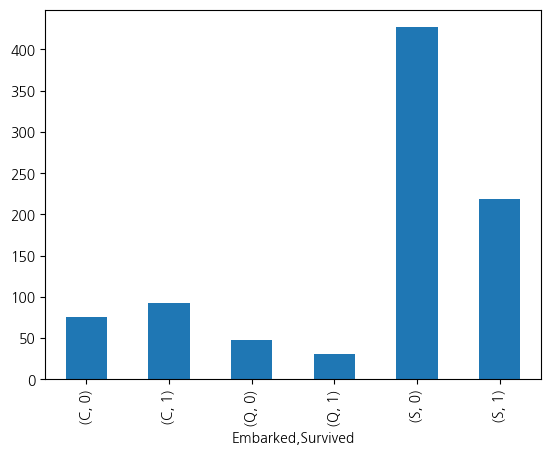

In [97]:
data.groupby('Embarked')['Survived'].value_counts(sort=False).plot(kind='bar')

<AxesSubplot:xlabel='family,Survived'>

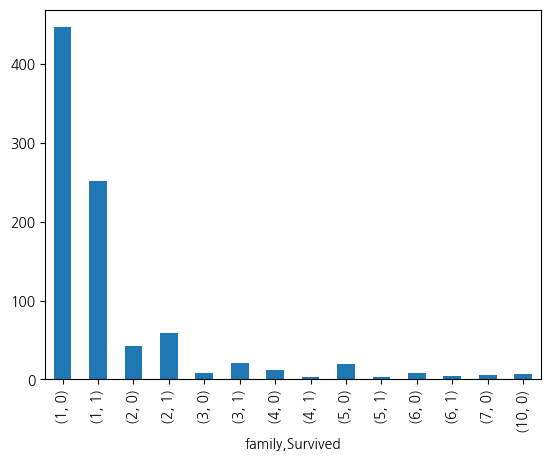

In [98]:
data.groupby('family')['Survived'].value_counts(sort=False).plot(kind='bar')

<AxesSubplot:xlabel='Pclass,Sex,Survived'>

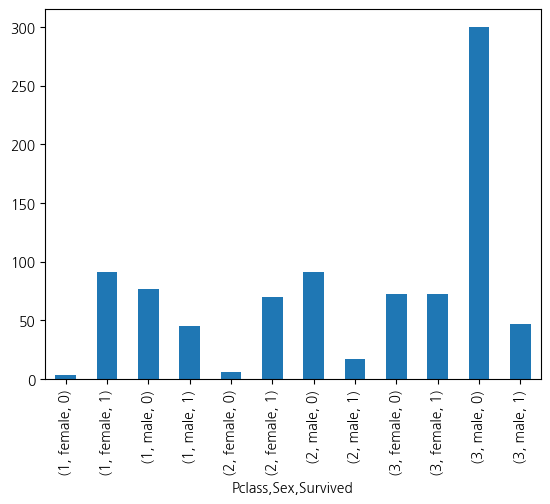

In [99]:
data.groupby(["Pclass", "Sex"])["Survived"].value_counts(sort=False).plot(kind='bar')

비교적 여성 생존률 높고, 1,2,클래스 여성이 3클래스 여성보다 높네

<AxesSubplot:xlabel='family,Survived'>

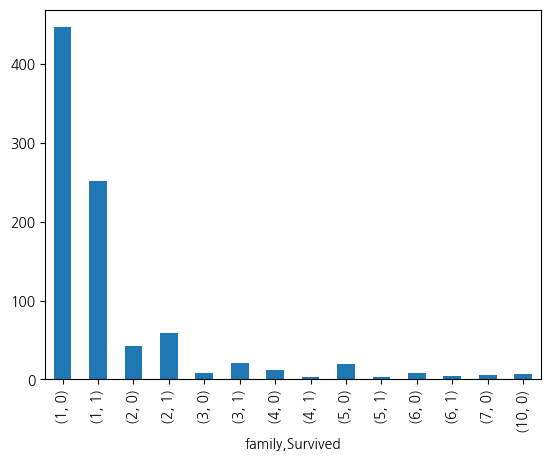

In [100]:
data.groupby('family')['Survived'].value_counts(sort=False).plot(kind='bar')

파생변수, 더미변수 만들자

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    object
 4   Embarked  891 non-null    object
 5   family    891 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 41.9+ KB


In [102]:
# Pclass의 1이 서열이 가장 높으므로 1에 높은 숫자 부여 1 -> 3, 3 -> 1 
data['Pclass'] = data['Pclass'].replace({1:3, 3:1})  

C:\Users\hi\AppData\Local\Temp\ipykernel_7700\3636171935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pclass'] = data['Pclass'].replace({1:3, 3:1})


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    object
 4   Embarked  891 non-null    object
 5   family    891 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 41.9+ KB


In [104]:
data = pd.get_dummies(data, columns=['Sex', 'Age', 'Embarked'], drop_first=True)

In [105]:
data.head()

,Survived,Pclass,family,Sex_male,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Age_under10s,Embarked_Q,Embarked_S
0,0,1,1,1,1,0,0,0,0,0,0,0,0,1
1,1,3,1,0,0,1,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0,0,0,0,0,1
3,1,3,1,0,0,1,0,0,0,0,0,0,0,1
4,0,1,1,1,0,1,0,0,0,0,0,0,0,1


변수 나누고 홀드아웃하자

In [106]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

분석해보자

In [108]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
model = DecisionTreeClassifier(max_depth = 5, random_state=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8379888268156425
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.78      0.74      0.76        62

    accuracy                           0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [109]:
importances = pd.DataFrame(model.feature_importances_.transpose(), index=model.feature_names_in_)
importances.sort_values(by=0, ascending=False)

,0
Sex_male,0.550347
Pclass,0.183299
family,0.153019
Age_under10s,0.043264
Embarked_S,0.025498
Age_40s,0.023511
Age_60s,0.007515
Age_70s,0.005545
Age_80s,0.004109
Age_30s,0.002575


In [110]:
# 배깅
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
bcf = BaggingClassifier(n_estimators=1000, n_jobs=-1, random_state = 10)
bcf.fit(X_train, y_train)
pred_bcf = bcf.predict(X_test)
print(accuracy_score(y_test, pred_bcf))
print(classification_report(y_test, pred_bcf))

0.8491620111731844
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       117
           1       0.79      0.77      0.78        62

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



In [111]:
# 에이다 부스팅 ADABoosting
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 1000, random_state=10) #멀티코어 n-jobs사용불가
ada.fit(X_train, y_train)
pred_ada = ada.predict(X_test)
print(accuracy_score(y_test, pred_ada))
print(classification_report(y_test, pred_ada))

0.8268156424581006
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       117
           1       0.74      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [112]:
# 그래디언트부스팅 GradientTreeBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000, random_state=10)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
print(accuracy_score(y_test, pred_gbc))
print(classification_report(y_test, pred_gbc))

0.8268156424581006
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.71      0.74        62

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.83      0.82       179



In [113]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators= 1000, n_jobs=-1, learning_rate=0.01, random_state=10)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators= 1000, n_jobs=-1, learning_rate=0.01, random_state=10)
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_test)
print(accuracy_score(y_test, pred_lgbm))
print(classification_report(y_test, pred_lgbm))

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 1000, n_jobs=-1, random_state=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

In [ ]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators= 1000, n_jobs=-1, random_state=10)
etc.fit(X_train, y_train)
pred_etc = etc.predict(X_test)
print(accuracy_score(y_test, pred_etc))
print(classification_report(y_test, pred_etc))

In [ ]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

- 분석내용(9개의 분석모델 사용)
- 상위3개 모델
- 1위 : ExtraTreesClassifier
- 2위 : RandomForestClassifier
- 3위 : XGBClassifier, LGBMClassifier123(공동)
- 하위 3개 모델(AdaBoostClassifier/ LogisticRegression/GradientBoostingClassifier)


데이터 다시 불러오기(혹시 필요시)

In [114]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')
data = data.drop('Cabin',axis=1)
from sklearn.impute import KNNImputer
KNN_imputer = KNNImputer(n_neighbors=1)
data['Age'] = KNN_imputer.fit_transform(data['Age'].values.reshape(-1,1))[:,0]
data['Embarked'] = data['Embarked'].fillna("S")
data['family'] = data['SibSp'] + data['Parch']
data['family'] = data['family'].apply(lambda x: 1 if x == 0 else x)
data['adj_fare'] = data['Fare'] / data['family']
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'family']]
data['Pclass'] = data['Pclass'].replace({1:3, 3:1})


In [133]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,1,male,22.0,S,1
1,1,3,female,38.0,C,1
2,1,1,female,26.0,S,1
3,1,3,female,35.0,S,1
4,0,1,male,35.0,S,1


In [134]:
data['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

In [115]:
# 나이 구간화 하지 않음.
data = pd.get_dummies(data, columns=['Sex', 'Age', 'Embarked'], drop_first=True)

In [145]:
data.head()

,Survived,Pclass,family,Sex_male,Age_0.67,Age_0.75,Age_0.83,Age_0.92,Age_1.0,Age_2.0,...,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Embarked_Q,Embarked_S
0,0,1,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,3,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,3,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,1,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [119]:
data['Sex_male'].value_counts()

Sex_male
True     577
False    314
Name: count, dtype: int64

In [120]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [121]:
data['Embarked_Q'].value_counts()

Embarked_Q
False    814
True      77
Name: count, dtype: int64

하이퍼 파라미터 튜닝과 데이터증폭 정도를 한번 해볼 수는 있겠네?

데이터 증폭을 하기위해서는 홀드아웃을 시키고 train데이터에만 증폭을 해야 해!

In [116]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [172]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [212]:
#데이터 증폭!
from imblearn.over_sampling import SMOTE
smt = SMOTE(k_neighbors=2, random_state=7, n_jobs=-1)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [213]:
y_train.value_counts()

Survived
0    432
1    280
Name: count, dtype: int64

In [214]:
y_res.value_counts()

Survived
0    432
1    432
Name: count, dtype: int64

In [215]:
y_test.value_counts()

Survived
0    117
1     62
Name: count, dtype: int64

그리드서치 이용해서 최적 파라미터 찾기(상위3위까지)

In [200]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
params = dict(n_estimators=[100, 500, 1000])
grid_cv = GridSearchCV(etc, param_grid=params, cv=5, n_jobs=-1, verbose=3)
grid_cv.fit(X_train, y_train)
print(sorted(grid_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print(f'최고 예측 정확도: {grid_cv.best_score_ :.4f}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'n_estimators': 500}
최고 예측 정확도: 0.7809


In [197]:
# RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = dict(n_estimators=[100, 500, 1000])
grid_cv = GridSearchCV(rfc, param_grid=params, cv=5, n_jobs=-1, verbose=3)
grid_cv.fit(X_train, y_train)
print(sorted(grid_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print(f'최고 예측 정확도: {grid_cv.best_score_ :.4f}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'n_estimators': 500}
최고 예측 정확도: 0.7838


In [198]:
# XGBClassifier
from sklearn.model_selection import GridSearchCV
params = dict(max_depth=[3,5,10], n_estimators=[100, 500, 1000], learning_rate=[0.01, 0.05, 0.1])
grid_cv = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1, verbose=3)
grid_cv.fit(X_train, y_train)
print(sorted(grid_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print(f'최고 예측 정확도: {grid_cv.best_score_ :.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
최고 예측 정확도: 0.8047


In [199]:
# LightGBM
from sklearn.model_selection import GridSearchCV
params = dict(max_depth=[3,5,10], n_estimators=[100, 500, 1000], learning_rate=[0.01, 0.05, 0.1])
grid_cv = GridSearchCV(lgbm, param_grid=params, cv=5, n_jobs=-1, verbose=3)
grid_cv.fit(X_train, y_train)
print(sorted(grid_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print(f'최고 예측 정확도: {grid_cv.best_score_ :.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 280, number of negative: 432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393258 -> initscore=-0.433636
[LightGBM] [Info] Start training from score -0.433636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

* 증폭 전,  하이퍼파라미터 튜닝 적용해서 다시 돌려보기!(상위 3위까지만)

In [201]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators= 500, n_jobs=-1, random_state=10)
etc.fit(X_train, y_train)
pred_etc = etc.predict(X_test)
print(accuracy_score(y_test, pred_etc))
print(classification_report(y_test, pred_etc))

# 최적 하이퍼 파라미터:  {'n_estimators': 500}
# 최고 예측 정확도: 0.7809

0.8156424581005587
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       117
           1       0.75      0.69      0.72        62

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179



전보다 3정도 더 떨어지네.

In [202]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 500, n_jobs=-1, random_state=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

# 최적 하이퍼 파라미터:  {'n_estimators': 500}
# 최고 예측 정확도: 0.7838

0.8268156424581006
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       117
           1       0.75      0.74      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [203]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators= 100, n_jobs=-1, learning_rate=0.5, random_state=10,  max_depth=3)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))

# 최적 하이퍼 파라미터:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
# 최고 예측 정확도: 0.8047

0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       117
           1       0.75      0.65      0.70        62

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



In [204]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators= 1000, n_jobs=-1, learning_rate=0.01, random_state=10, max_depth=3)
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_test)
print(accuracy_score(y_test, pred_lgbm))
print(classification_report(y_test, pred_lgbm))

# 최적 하이퍼 파라미터:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
# 최고 예측 정확도: 0.8104

[LightGBM] [Info] Number of positive: 280, number of negative: 432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393258 -> initscore=-0.433636
[LightGBM] [Info] Start training from score -0.433636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


결론: 하이퍼파라미터 튜닝을 한 후 결과는 약 3정도 수치가 더 떨어졌다.(왜지?)

- 데이터 증폭 + 하이퍼 파라미터 적용하지 않은 처음 모델로 다시 돌려보기!(상위 3위까지만)

In [ ]:
# X_res, y_res

In [216]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators= 1000, n_jobs=-1, random_state=10)
etc.fit(X_res, y_res)
pred_etc = etc.predict(X_test)
print(accuracy_score(y_test, pred_etc))
print(classification_report(y_test, pred_etc))

0.770949720670391
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       117
           1       0.63      0.81      0.71        62

    accuracy                           0.77       179
   macro avg       0.76      0.78      0.76       179
weighted avg       0.79      0.77      0.78       179



In [217]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 1000, n_jobs=-1, random_state=10)
rfc.fit(X_res, y_res)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

0.7486033519553073
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       117
           1       0.60      0.82      0.69        62

    accuracy                           0.75       179
   macro avg       0.74      0.77      0.74       179
weighted avg       0.78      0.75      0.75       179



애매한 결론: 정확도는 0.84에서 0.75로 떨어졌지만(사망에 대한 recall값이 0.90에서 0.71로 떨어지고 대체적으로 떨어졌으나, 생존에 대한 recall 값이 0.74에서 0.82로 올랐네. 생존예측이 분석목적이니까, 전보다 더 나아졌다고 판단하는 게 맞나??

In [218]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators= 1000, n_jobs=-1, learning_rate=0.01, random_state=10)
xgb.fit(X_res, y_res)
pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))

0.8156424581005587
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       117
           1       0.73      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



생존에 대한 recall값이 살짝 오르고, 사망에 대한 recall값이 살짝 떨어졌네

In [219]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators= 1000, n_jobs=-1, learning_rate=0.01, random_state=10)
lgbm.fit(X_res, y_res)
pred_lgbm = lgbm.predict(X_test)
print(accuracy_score(y_test, pred_lgbm))
print(classification_report(y_test, pred_lgbm))


[LightGBM] [Info] Number of positive: 432, number of negative: 432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 864, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

맨 처음에 한 거보다 전반적으로 같거나 좀 떨어짐.

- 결론: 데이터 증폭을 하면 생존 데이터를 증폭시켰으니 생존에 대해서 recall이 좋아지는 부분이 있다. 하지만 가장 초반에 세팅된 모델로 하는 것 보다 큰 차이는 없음. 
- 데이터 증폭을 한 거보다, 하이퍼 파라미터 튜닝을 한 것보다 그냥 처음에 수업시간에 세팅한 파라미터의 결과가 제일 좋다.

딥러닝 돌리기, 파이프라인 만들기 도전만 남았네!

* 딥러닝 돌리기

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [120]:
# Sequential
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation = 'relu'))
model. add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                2820      
                                                                 
 dense_6 (Dense)             (None, 60)                1860      
                                                                 
 dense_7 (Dense)             (None, 30)                1830      
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 7,471
Trainable params: 7,471
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

Epoch 1/20
18/18 [==============================] - 1s 21ms/step - loss: 0.6783 - accuracy: 0.6264 - val_loss: 0.6417 - val_accuracy: 0.7709
Epoch 2/20
18/18 [==============================] - 0s 11ms/step - loss: 0.6161 - accuracy: 0.7374 - val_loss: 0.5569 - val_accuracy: 0.8045
Epoch 3/20
18/18 [==============================] - 0s 10ms/step - loss: 0.5233 - accuracy: 0.8034 - val_loss: 0.4586 - val_accuracy: 0.8380
Epoch 4/20
18/18 [==============================] - 0s 11ms/step - loss: 0.4588 - accuracy: 0.8062 - val_loss: 0.4296 - val_accuracy: 0.8268
Epoch 5/20
18/18 [==============================] - 0s 9ms/step - loss: 0.4291 - accuracy: 0.8272 - val_loss: 0.4275 - val_accuracy: 0.8156
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 0.4146 - accuracy: 0.8329 - val_loss: 0.4238 - val_accuracy: 0.8268
Epoch 7/20
18/18 [==============================] - 0s 9ms/step - loss: 0.4024 - accuracy: 0.8413 - val_loss: 0.4272 - val_accuracy: 0.8268
Epoch 8/20
18/18

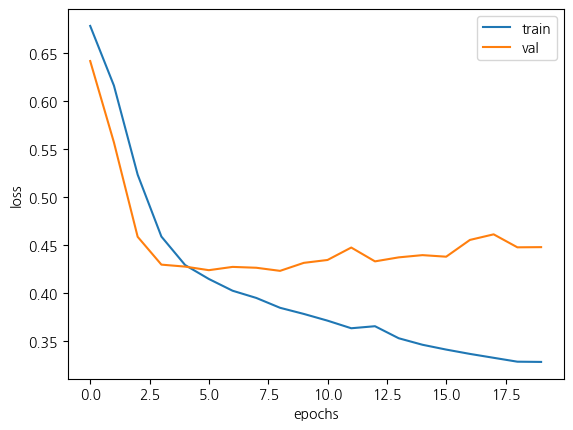

In [123]:
#그림그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [131]:
# Tensorflow Functional
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
inputs = Input(shape=(X_train.shape[1], ))
x = Dense(30, activation='relu')(inputs)
x = Dense(60, activation='relu')(x)
x = Dense(15, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_10 (Dense)            (None, 30)                2820      
                                                                 
 dense_11 (Dense)            (None, 60)                1860      
                                                                 
 dense_12 (Dense)            (None, 15)                915       
                                                                 
 dense_13 (Dense)            (None, 1)                 16        
                                                                 
Total params: 5,611
Trainable params: 5,611
Non-trainable params: 0
_________________________________________________________________


In [132]:
## 신경망 훈련 시 사용할 파라미터 세팅
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 훈련한 거를 history변수에 담아주기(나중에 그래프 그려보려구)
history=model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))

# 딥러닝 모델 성능평가
score=model.evaluate(X_test, y_test)
print('test_loss', score[0])
print('test_accuracy', score[1])

pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Epoch 1/400
8/8 [==============================] - 1s 33ms/step - loss: 0.6915 - accuracy: 0.5225 - val_loss: 0.6784 - val_accuracy: 0.6480
Epoch 2/400
8/8 [==============================] - 0s 14ms/step - loss: 0.6731 - accuracy: 0.6166 - val_loss: 0.6605 - val_accuracy: 0.6704
Epoch 3/400
8/8 [==============================] - 0s 13ms/step - loss: 0.6577 - accuracy: 0.6208 - val_loss: 0.6452 - val_accuracy: 0.6927
Epoch 4/400
8/8 [==============================] - 0s 13ms/step - loss: 0.6439 - accuracy: 0.6419 - val_loss: 0.6258 - val_accuracy: 0.7095
Epoch 5/400
8/8 [==============================] - 0s 11ms/step - loss: 0.6273 - accuracy: 0.6475 - val_loss: 0.6053 - val_accuracy: 0.7207
Epoch 6/400
8/8 [==============================] - 0s 13ms/step - loss: 0.6091 - accuracy: 0.6531 - val_loss: 0.5818 - val_accuracy: 0.7374
Epoch 7/400
8/8 [==============================] - 0s 14ms/step - loss: 0.5880 - accuracy: 0.7079 - val_loss: 0.5575 - val_accuracy: 0.7989
Epoch 8/400
8/8 [===

8/8 [==============================] - 0s 11ms/step - loss: 0.2472 - accuracy: 0.8947 - val_loss: 0.5358 - val_accuracy: 0.8268
Epoch 118/400
8/8 [==============================] - 0s 11ms/step - loss: 0.2464 - accuracy: 0.8975 - val_loss: 0.5336 - val_accuracy: 0.8156
Epoch 119/400
8/8 [==============================] - 0s 11ms/step - loss: 0.2500 - accuracy: 0.8933 - val_loss: 0.5370 - val_accuracy: 0.8212
Epoch 120/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2446 - accuracy: 0.8975 - val_loss: 0.5407 - val_accuracy: 0.8212
Epoch 121/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2491 - accuracy: 0.8904 - val_loss: 0.5389 - val_accuracy: 0.8212
Epoch 122/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2438 - accuracy: 0.8933 - val_loss: 0.5438 - val_accuracy: 0.8156
Epoch 123/400
8/8 [==============================] - 0s 11ms/step - loss: 0.2476 - accuracy: 0.8975 - val_loss: 0.5488 - val_accuracy: 0.8156
Epoch 124/400
8/8 [==

Epoch 175/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2257 - accuracy: 0.9031 - val_loss: 0.6123 - val_accuracy: 0.8268
Epoch 176/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2250 - accuracy: 0.9045 - val_loss: 0.6022 - val_accuracy: 0.8212
Epoch 177/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2256 - accuracy: 0.9017 - val_loss: 0.6059 - val_accuracy: 0.8212
Epoch 178/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2228 - accuracy: 0.9059 - val_loss: 0.6095 - val_accuracy: 0.8268
Epoch 179/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2253 - accuracy: 0.8989 - val_loss: 0.6129 - val_accuracy: 0.8268
Epoch 180/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2218 - accuracy: 0.9087 - val_loss: 0.6387 - val_accuracy: 0.8156
Epoch 181/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2210 - accuracy: 0.9087 - val_loss: 0.6461 - val_accuracy: 0.8101
Epoch 

Epoch 233/400
8/8 [==============================] - 0s 11ms/step - loss: 0.2143 - accuracy: 0.9101 - val_loss: 0.6579 - val_accuracy: 0.8156
Epoch 234/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2163 - accuracy: 0.9059 - val_loss: 0.6678 - val_accuracy: 0.8156
Epoch 235/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2178 - accuracy: 0.9073 - val_loss: 0.6757 - val_accuracy: 0.8101
Epoch 236/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2120 - accuracy: 0.9059 - val_loss: 0.6635 - val_accuracy: 0.8156
Epoch 237/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2119 - accuracy: 0.9115 - val_loss: 0.6680 - val_accuracy: 0.8212
Epoch 238/400
8/8 [==============================] - 0s 13ms/step - loss: 0.2112 - accuracy: 0.9129 - val_loss: 0.6676 - val_accuracy: 0.8156
Epoch 239/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2131 - accuracy: 0.9087 - val_loss: 0.6800 - val_accuracy: 0.8156
Epoch 

Epoch 291/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2032 - accuracy: 0.9129 - val_loss: 0.6878 - val_accuracy: 0.8156
Epoch 292/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2049 - accuracy: 0.9129 - val_loss: 0.6852 - val_accuracy: 0.8212
Epoch 293/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2039 - accuracy: 0.9129 - val_loss: 0.6780 - val_accuracy: 0.8212
Epoch 294/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2047 - accuracy: 0.9115 - val_loss: 0.6987 - val_accuracy: 0.8212
Epoch 295/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2076 - accuracy: 0.9115 - val_loss: 0.7162 - val_accuracy: 0.8156
Epoch 296/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2111 - accuracy: 0.9073 - val_loss: 0.7161 - val_accuracy: 0.8156
Epoch 297/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2092 - accuracy: 0.9115 - val_loss: 0.7283 - val_accuracy: 0.8212
Epoch 298/

Epoch 349/400
8/8 [==============================] - 0s 12ms/step - loss: 0.1989 - accuracy: 0.9129 - val_loss: 0.7723 - val_accuracy: 0.8156
Epoch 350/400
8/8 [==============================] - 0s 9ms/step - loss: 0.1985 - accuracy: 0.9157 - val_loss: 0.7839 - val_accuracy: 0.8156
Epoch 351/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2046 - accuracy: 0.9087 - val_loss: 0.7881 - val_accuracy: 0.8101
Epoch 352/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2100 - accuracy: 0.9101 - val_loss: 0.7604 - val_accuracy: 0.8156
Epoch 353/400
8/8 [==============================] - 0s 9ms/step - loss: 0.1974 - accuracy: 0.9157 - val_loss: 0.7403 - val_accuracy: 0.8212
Epoch 354/400
8/8 [==============================] - 0s 9ms/step - loss: 0.1998 - accuracy: 0.9157 - val_loss: 0.7403 - val_accuracy: 0.8212
Epoch 355/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2092 - accuracy: 0.9101 - val_loss: 0.7548 - val_accuracy: 0.8156
Epoch 356/4

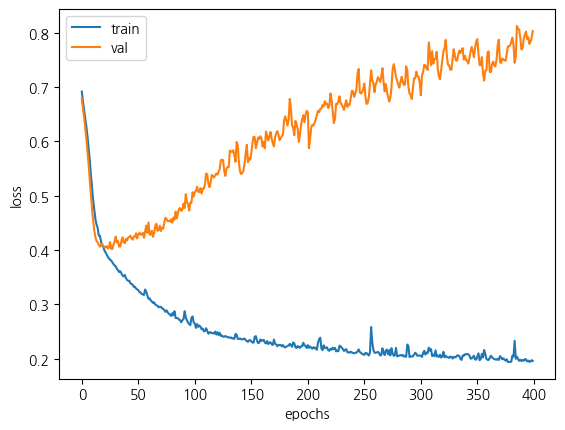

In [133]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [138]:
# Model Subclassing
class Titanic(tf.keras.Model):

    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(30, activation = 'relu')
        self.dense2 = tf.keras.layers.Dense(60, activation = 'relu')
        self.dense3 = tf.keras.layers.Dense(15, activation = 'relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [139]:
model = Titanic() 

In [140]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))

score=model.evaluate(X_test, y_test)
print('test_loss', score[0])
print('test_accuracy', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Epoch 1/400
8/8 [==============================] - 1s 33ms/step - loss: 0.6753 - accuracy: 0.5997 - val_loss: 0.6647 - val_accuracy: 0.6536
Epoch 2/400
8/8 [==============================] - 0s 13ms/step - loss: 0.6584 - accuracy: 0.6067 - val_loss: 0.6488 - val_accuracy: 0.6536
Epoch 3/400
8/8 [==============================] - 0s 14ms/step - loss: 0.6456 - accuracy: 0.6067 - val_loss: 0.6284 - val_accuracy: 0.6536
Epoch 4/400
8/8 [==============================] - 0s 11ms/step - loss: 0.6292 - accuracy: 0.6081 - val_loss: 0.6019 - val_accuracy: 0.6536
Epoch 5/400
8/8 [==============================] - 0s 12ms/step - loss: 0.6049 - accuracy: 0.6390 - val_loss: 0.5735 - val_accuracy: 0.7542
Epoch 6/400
8/8 [==============================] - 0s 14ms/step - loss: 0.5763 - accuracy: 0.7261 - val_loss: 0.5392 - val_accuracy: 0.7933
Epoch 7/400
8/8 [==============================] - 0s 11ms/step - loss: 0.5431 - accuracy: 0.7697 - val_loss: 0.5047 - val_accuracy: 0.7933
Epoch 8/400
8/8 [===

8/8 [==============================] - 0s 9ms/step - loss: 0.2378 - accuracy: 0.9045 - val_loss: 0.4908 - val_accuracy: 0.8268
Epoch 118/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2396 - accuracy: 0.9017 - val_loss: 0.4778 - val_accuracy: 0.8324
Epoch 119/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2352 - accuracy: 0.9045 - val_loss: 0.4884 - val_accuracy: 0.8324
Epoch 120/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2344 - accuracy: 0.9059 - val_loss: 0.4875 - val_accuracy: 0.8324
Epoch 121/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2358 - accuracy: 0.8961 - val_loss: 0.4729 - val_accuracy: 0.8380
Epoch 122/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2328 - accuracy: 0.9031 - val_loss: 0.4867 - val_accuracy: 0.8268
Epoch 123/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2354 - accuracy: 0.9059 - val_loss: 0.4759 - val_accuracy: 0.8380
Epoch 124/400
8/8 [=======

Epoch 175/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2154 - accuracy: 0.9059 - val_loss: 0.5557 - val_accuracy: 0.8156
Epoch 176/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2135 - accuracy: 0.9087 - val_loss: 0.5446 - val_accuracy: 0.8212
Epoch 177/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2126 - accuracy: 0.9115 - val_loss: 0.5460 - val_accuracy: 0.8045
Epoch 178/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2131 - accuracy: 0.9101 - val_loss: 0.5621 - val_accuracy: 0.8045
Epoch 179/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2118 - accuracy: 0.9101 - val_loss: 0.5503 - val_accuracy: 0.8212
Epoch 180/400
8/8 [==============================] - 0s 11ms/step - loss: 0.2115 - accuracy: 0.9143 - val_loss: 0.5505 - val_accuracy: 0.8212
Epoch 181/400
8/8 [==============================] - 0s 12ms/step - loss: 0.2126 - accuracy: 0.9101 - val_loss: 0.5608 - val_accuracy: 0.8156
Epoch 182

Epoch 233/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2049 - accuracy: 0.9087 - val_loss: 0.6166 - val_accuracy: 0.8156
Epoch 234/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2090 - accuracy: 0.9087 - val_loss: 0.6396 - val_accuracy: 0.8101
Epoch 235/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2059 - accuracy: 0.9073 - val_loss: 0.6421 - val_accuracy: 0.8101
Epoch 236/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2101 - accuracy: 0.9115 - val_loss: 0.6152 - val_accuracy: 0.8101
Epoch 237/400
8/8 [==============================] - 0s 11ms/step - loss: 0.2107 - accuracy: 0.9045 - val_loss: 0.5957 - val_accuracy: 0.8101
Epoch 238/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2027 - accuracy: 0.9115 - val_loss: 0.6281 - val_accuracy: 0.7989
Epoch 239/400
8/8 [==============================] - 0s 11ms/step - loss: 0.2087 - accuracy: 0.9045 - val_loss: 0.6077 - val_accuracy: 0.8156
Epoch 240/

Epoch 291/400
8/8 [==============================] - 0s 11ms/step - loss: 0.1943 - accuracy: 0.9129 - val_loss: 0.6569 - val_accuracy: 0.8045
Epoch 292/400
8/8 [==============================] - 0s 10ms/step - loss: 0.1995 - accuracy: 0.9073 - val_loss: 0.6747 - val_accuracy: 0.8045
Epoch 293/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2055 - accuracy: 0.9045 - val_loss: 0.6275 - val_accuracy: 0.8101
Epoch 294/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2034 - accuracy: 0.9031 - val_loss: 0.6173 - val_accuracy: 0.8101
Epoch 295/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2009 - accuracy: 0.9143 - val_loss: 0.6500 - val_accuracy: 0.8101
Epoch 296/400
8/8 [==============================] - 0s 10ms/step - loss: 0.1980 - accuracy: 0.9073 - val_loss: 0.6822 - val_accuracy: 0.8101
Epoch 297/400
8/8 [==============================] - 0s 9ms/step - loss: 0.1982 - accuracy: 0.9101 - val_loss: 0.6968 - val_accuracy: 0.7989
Epoch 298

Epoch 349/400
8/8 [==============================] - 0s 9ms/step - loss: 0.1976 - accuracy: 0.9115 - val_loss: 0.7416 - val_accuracy: 0.8101
Epoch 350/400
8/8 [==============================] - 0s 9ms/step - loss: 0.2131 - accuracy: 0.9045 - val_loss: 0.7213 - val_accuracy: 0.8101
Epoch 351/400
8/8 [==============================] - 0s 9ms/step - loss: 0.1943 - accuracy: 0.9115 - val_loss: 0.7599 - val_accuracy: 0.7989
Epoch 352/400
8/8 [==============================] - 0s 10ms/step - loss: 0.1941 - accuracy: 0.9129 - val_loss: 0.7369 - val_accuracy: 0.8101
Epoch 353/400
8/8 [==============================] - 0s 10ms/step - loss: 0.2030 - accuracy: 0.9115 - val_loss: 0.7953 - val_accuracy: 0.7933
Epoch 354/400
8/8 [==============================] - 0s 9ms/step - loss: 0.1991 - accuracy: 0.9059 - val_loss: 0.7303 - val_accuracy: 0.7989
Epoch 355/400
8/8 [==============================] - 0s 9ms/step - loss: 0.1947 - accuracy: 0.9101 - val_loss: 0.7154 - val_accuracy: 0.8101
Epoch 356/4

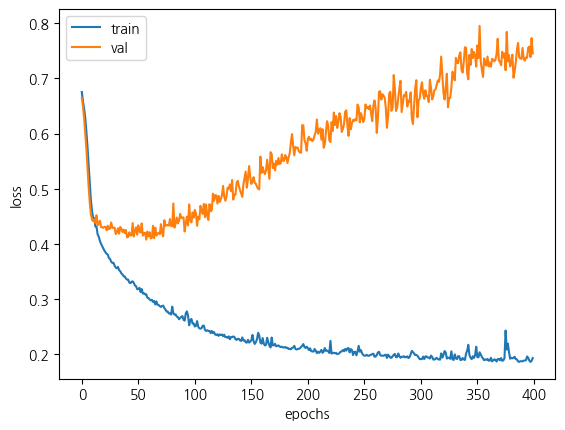

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

early_stopping과 checkpointer를 사용해보자

In [166]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [167]:
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation = 'relu'))
model. add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
modelpath = "./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])

score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 30)                2820      
                                                                 
 dense_52 (Dense)            (None, 60)                1860      
                                                                 
 dense_53 (Dense)            (None, 30)                1830      
                                                                 
 dense_54 (Dense)            (None, 30)                930       
                                                                 
 dense_55 (Dense)            (None, 1)                 31        
                                                                 
Total params: 7,471
Trainable params: 7,471
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 8ms/step -

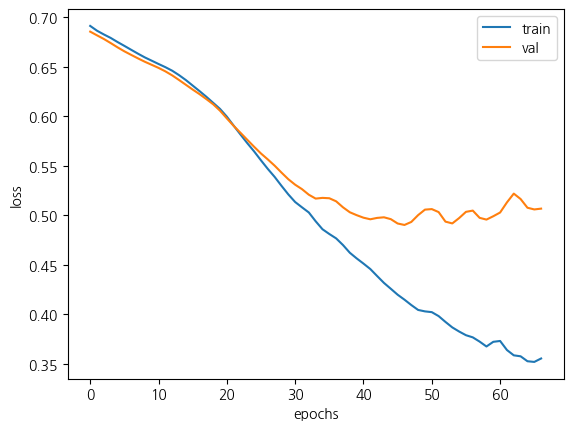

In [168]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [169]:
# Tensorflow Functional
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
inputs = Input(shape=(X_train.shape[1], ))
x = Dense(30, activation='relu')(inputs)
x = Dense(60, activation='relu')(x)
x = Dense(15, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs, x)
model.summary()
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
modelpath = "./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])

score=model.evaluate(X_test, y_test)
print('test_loss', score[0])
print('test_accuracy', score[1])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_56 (Dense)            (None, 30)                2820      
                                                                 
 dense_57 (Dense)            (None, 60)                1860      
                                                                 
 dense_58 (Dense)            (None, 15)                915       
                                                                 
 dense_59 (Dense)            (None, 1)                 16        
                                                                 
Total params: 5,611
Trainable params: 5,611
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 7ms/step - loss

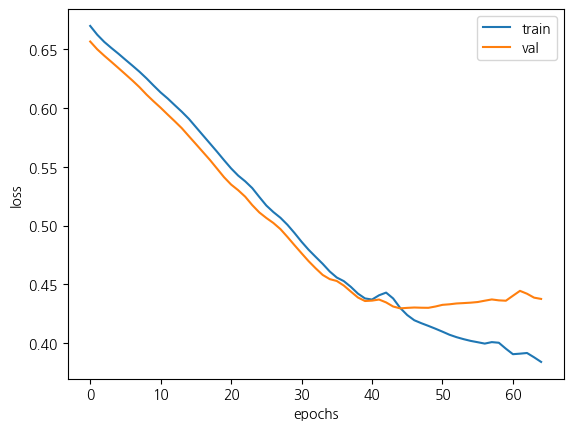

In [170]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [171]:
# Model Subclassing
class Titanic(tf.keras.Model):

    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(30, activation = 'relu')
        self.dense2 = tf.keras.layers.Dense(60, activation = 'relu')
        self.dense3 = tf.keras.layers.Dense(15, activation = 'relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [172]:
model = Titanic() 

In [173]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
modelpath = "./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])

score=model.evaluate(X_test, y_test)
print('test_loss', score[0])
print('test_accuracy', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

결론: Sequential과 Tensorflow Functional의 정확도는 80퍼센트 정도로, 머신러닝보다 좋은 성과를 냈다고 말할 수는 없다. 또한 클래스로 모듈한 것은 model을 save하는 게 불가능해서 checkpoint사용 불가.

In [174]:
# Model Subclassing
class Titanic(tf.keras.Model):

    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(30, activation = 'relu')
        self.dense2 = tf.keras.layers.Dense(60, activation = 'relu')
        self.dense3 = tf.keras.layers.Dense(15, activation = 'relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [175]:
model = Titanic() 

In [176]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0,
                   callbacks=[early_stopping_callback])

score=model.evaluate(X_test, y_test)
print('test_loss', score[0])
print('test_accuracy', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

6/6 [==============================] - 0s 5ms/step - loss: 0.4438 - accuracy: 0.8212
test_loss 0.4437715709209442
test_accuracy 0.8212290406227112
6/6 [==============================] - 0s 3ms/step
0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       117
           1       0.78      0.68      0.72        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



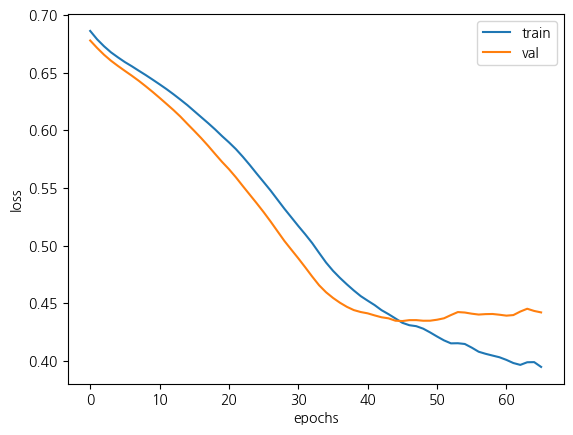

In [177]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()